In [1]:
# libraries
import glob
import mne
from mne import grand_average
from tqdm import tqdm

In [2]:
# get epoch filepaths
epo_files = sorted(glob.glob(f"epochs/*.fif"))

# get fwd models filepaths
fwd_files = sorted(glob.glob(f"models/*.fif"))

epo_files, fwd_files

(['epochs/0163-epo.fif',
  'epochs/0164-epo.fif',
  'epochs/0165-epo.fif',
  'epochs/0166-epo.fif',
  'epochs/0167-epo.fif',
  'epochs/0168-epo.fif',
  'epochs/0169-epo.fif',
  'epochs/0170-epo.fif'],
 ['models/0163-fwd.fif',
  'models/0164-fwd.fif',
  'models/0165-fwd.fif',
  'models/0166-fwd.fif',
  'models/0167-fwd.fif',
  'models/0168-fwd.fif',
  'models/0169-fwd.fif',
  'models/0170-fwd.fif'])

In [3]:
# function for creating averages (evoked responses) and difference waves
def compute_evoked_diff(epochs):
    evokeds = list()
    for event in epochs.event_id:
        evokeds.append(epochs[event].average())

    diffs_comment = ['CE - NE']
    diffs = [(2,0)] # PAS 1-3 contrast
    for diff in diffs:
        evoked_diff = evokeds[diff[0]].copy() # create a copy
        evoked_diff.data -= evokeds[diff[1]].data # modify the data in place
        evoked_diff.comment = diffs_comment
    
    return evoked_diff

In [4]:
mne.set_log_level('WARNING') # turning off verbose so loadbar is updated in-place

evoked_diffs = []

# for each subject (THIS TAKES APPROX. 2 MIN ON 8 CPU)
for epo_file in tqdm(epo_files):

    # load epochs
    epochs = mne.read_epochs(epo_file)

    # compute difference wave
    evoked_diff = compute_evoked_diff(epochs)

    # store results
    evoked_diffs.append(evoked_diff)

100%|██████████| 8/8 [01:16<00:00,  9.53s/it]


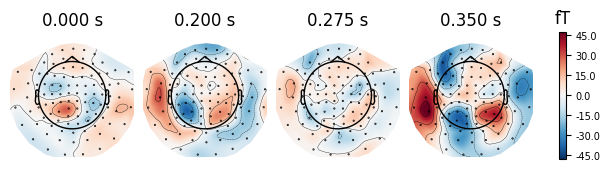

Text(0.5, 0.98, 'Group-level ACE–NE difference')

In [5]:
# compute group average
grand_avg = grand_average(evoked_diffs)

# plot
fig = mne.viz.plot_evoked_topomap(grand_avg, times=[0, 0.2, 0.275, 0.35])
fig.suptitle('Group-level ACE–NE difference', fontsize=16)

In [ ]:
# for each subject
for file in tqdm(fwd_files):

    # load fwd model
    fwd = mne.read_forward_solution(file)

    # do stuff with head models??